### Load Kaggle to directly load the dataset in colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Kaggle_key/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download aryashah2k/mango-leaf-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 95% 98.0M/103M [00:02<00:00, 49.6MB/s]
100% 103M/103M [00:03<00:00, 34.8MB/s] 


In [ ]:
! unzip /content/mango-leaf-disease-dataset.zip

Archive:  /content/mango-leaf-disease-dataset.zip
  inflating: Anthracnose/20211008_124249 (Custom).jpg  
  inflating: Anthracnose/20211008_124250 (Custom).jpg  
  inflating: Anthracnose/20211008_124252 (Custom).jpg  
  inflating: Anthracnose/20211008_124253 (Custom).jpg  
  inflating: Anthracnose/20211008_124256 (Custom).jpg  
  inflating: Anthracnose/20211008_124301 (Custom).jpg  
  inflating: Anthracnose/20211008_124302 (Custom).jpg  
  inflating: Anthracnose/20211008_124305 (Custom).jpg  
  inflating: Anthracnose/20211008_124306 (Custom).jpg  
  inflating: Anthracnose/20211008_124310 (Custom).jpg  
  inflating: Anthracnose/20211008_124312 (Custom).jpg  
  inflating: Anthracnose/20211008_124334 (Custom).jpg  
  inflating: Anthracnose/20211008_124336 (Custom).jpg  
  inflating: Anthracnose/20211008_124341 (Custom).jpg  
  inflating: Anthracnose/20211008_124345 (Custom).jpg  
  inflating: Anthracnose/20211008_124457 (Custom).jpg  
  inflating: Anthracnose/20211008_124501 (Custom).jpg 

In [ ]:
! mkdir Leaf_dataset

In [ ]:
! mv /content/Anthracnose /content/Leaf_dataset
! mv /content/Bacterial_Canker /content/Leaf_dataset
! mv /content/Cutting_Weevil /content/Leaf_dataset
! mv /content/Die_Back /content/Leaf_dataset
! mv /content/Gall_Midge /content/Leaf_dataset
! mv /content/Healthy /content/Leaf_dataset
! mv /content/Powdery_Mildew /content/Leaf_dataset
! mv /content/Sooty_Mould /content/Leaf_dataset

In [ ]:
import os

print('Anthracnose: ', len(os.listdir('/content/Leaf_dataset/Anthracnose')))
print('Bacterial Canker: ', len(os.listdir('/content/Leaf_dataset/Bacterial_Canker')))
print('Cutting Weevil: ', len(os.listdir('/content/Leaf_dataset/Cutting_Weevil')))
print('Die Back: ', len(os.listdir('/content/Leaf_dataset/Die_Back')))
print('Gall Midge: ', len(os.listdir('/content/Leaf_dataset/Gall_Midge')))
print('Healthy: ', len(os.listdir('/content/Leaf_dataset/Healthy')))
print('Powdery Mildew: ', len(os.listdir('/content/Leaf_dataset/Powdery_Mildew')))
print('Sooty Mould: ', len(os.listdir('/content/Leaf_dataset/Sooty_Mould')))

Anthracnose:  500
Bacterial Canker:  500
Cutting Weevil:  500
Die Back:  500
Gall Midge:  500
Healthy:  500
Powdery Mildew:  500
Sooty Mould:  500


### Data Augmentation

In [ ]:
import os
import cv2
import random

# Function to apply data augmentation techniques
def augment_data(input_folder, output_folder, augmentation_factor):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image in the input folder
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)

        # Read the image
        image = cv2.imread(image_path)

        # Check if the image is read successfully
        if image is not None:
            # Apply augmentation techniques
            for i in range(augmentation_factor):
                # Randomly choose augmentation technique
                augmentation = random.choice(['mirrior', "blur"])

                if augmentation == "mirror":
                    # Mirror the image
                    mirrored_image = cv2.flip(image, 1)
                    # Save the augmented image
                    cv2.imwrite(os.path.join(output_folder, f"{filename.split('.')[0]}mirror{i}.jpg"), mirrored_image)
                elif augmentation == "blur":
                    # Apply Gaussian blur with random kernel size (3x3 to 9x9)
                    kernel_size = (random.randrange(3, 10, 2), random.randrange(3, 10, 2))
                    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
                    # Save the augmented image
                    cv2.imwrite(os.path.join(output_folder, f"{filename.split('.')[0]}blur{i}.jpg"), blurred_image)
        else:
            print(f"Error reading image: {image_path}")

# Define input and output folders
for folder in os.listdir('/content/Leaf_dataset'):
    input_folder = '/content/Leaf_dataset/' + folder
    output_folder = '/content/Augmented/' + folder + '_aug'

    # Set augmentation factor (how many augmented images per original image)
    augmentation_factor = 3

    # Apply data augmentation
    augment_data(input_folder, output_folder, augmentation_factor)

In [ ]:
# Move all newly generated images to the main folder
import os
import shutil

for folder in os.listdir('/content/Leaf_dataset'):
  # Define the main folder
  main_folder = "/content/Augmented/" + folder + '_aug'
  destiny_folder = '/content/Leaf_dataset/' + folder
  # Iterate through subfolders
  for root, dirs, files in os.walk(main_folder):
      for file in files:
          # Get the full path of the file
          file_path = os.path.join(root, file)
          # Move the file to the main folder
          shutil.move(file_path, destiny_folder)

In [ ]:
print('Anthracnose: ', len(os.listdir('/content/Leaf_dataset/Anthracnose')))
print('Bacterial Canker: ', len(os.listdir('/content/Leaf_dataset/Bacterial_Canker')))
print('Cutting Weevil: ', len(os.listdir('/content/Leaf_dataset/Cutting_Weevil')))
print('Die Back: ', len(os.listdir('/content/Leaf_dataset/Die_Back')))
print('Gall Midge: ', len(os.listdir('/content/Leaf_dataset/Gall_Midge')))
print('Healthy: ', len(os.listdir('/content/Leaf_dataset/Healthy')))
print('Powdery Mildew: ', len(os.listdir('/content/Leaf_dataset/Powdery_Mildew')))
print('Sooty Mould: ', len(os.listdir('/content/Leaf_dataset/Sooty_Mould')))

Anthracnose:  1267
Bacterial Canker:  1265
Cutting Weevil:  1271
Die Back:  1238
Gall Midge:  1821
Healthy:  1246
Powdery Mildew:  1277
Sooty Mould:  1241


In [ ]:
!pip install split-folders
import splitfolders

# Define input and output folders
input_folder = "/content/Leaf_dataset"
output_folder = "/content/Leaf_dataset_split"

# Split the dataset into train, validation, and test sets with a ratio of 80%, 10%, 10% respectively
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.9, 0.05, 0.05))

Copying files: 10626 files [00:02, 3653.73 files/s]


### Saving the dataset to drive.

In [ ]:
! mv /content/Leaf_dataset_split /content/drive/MyDrive/Case_study_mango_leaf

### Model Building

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
import cv2

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist

!pip install keras-tuner --upgrade
import keras_tuner
import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Pass the Data here using Keras Data Loader from Directory
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/train",
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
)
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/val",
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
)

Found 9559 files belonging to 8 classes.
Found 528 files belonging to 8 classes.


In [ ]:
# Let us Build a model using VGG16

# # CONV_BASE SUMMARY
from keras.applications.vgg16 import VGG16

# for transfer learning we set include_top = False

conv_base_1 = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

conv_base_1.trainable = False
model = Sequential()
model.add(conv_base_1)
model.add(Flatten())

model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))


model.add(Dense(8,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_set, validation_data=val_set, epochs=10, shuffle=True)

Epoch 1/10
299/299 [==============================] - 1573s 5s/step - loss: 1.3016 - accuracy: 0.9285 - val_loss: 0.2914 - val_accuracy: 0.9621
Epoch 2/10
299/299 [==============================] - 48s 157ms/step - loss: 0.2386 - accuracy: 0.9779 - val_loss: 0.1979 - val_accuracy: 0.9905
Epoch 3/10
299/299 [==============================] - 47s 153ms/step - loss: 0.1484 - accuracy: 0.9865 - val_loss: 0.0889 - val_accuracy: 0.9905
Epoch 4/10
299/299 [==============================] - 47s 153ms/step - loss: 0.1677 - accuracy: 0.9890 - val_loss: 0.0391 - val_accuracy: 0.9981
Epoch 5/10
299/299 [==============================] - 48s 155ms/step - loss: 0.0823 - accuracy: 0.9934 - val_loss: 0.0458 - val_accuracy: 0.9962
Epoch 6/10
299/299 [==============================] - 47s 152ms/step - loss: 0.0548 - accuracy: 0.9963 - val_loss: 0.1297 - val_accuracy: 0.9848
Epoch 7/10
299/299 [==============================] - 47s 153ms/step - loss: 0.0553 - accuracy: 0.9957 - val_loss: 0.0642 - val_acc

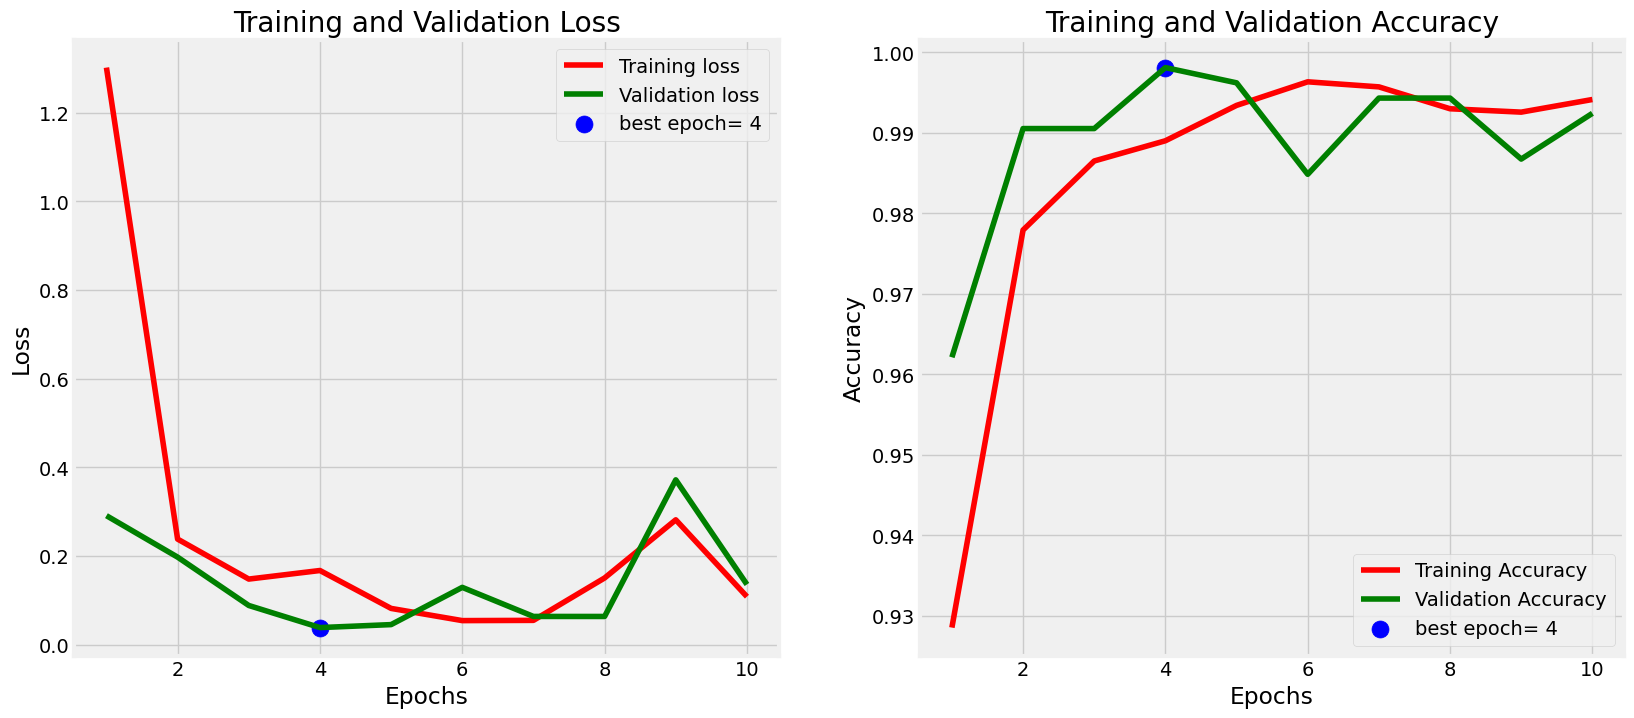

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

### The epoch number 4 shows the best accuracy so training with extra epochs.

In [ ]:
history_1 = model.fit(training_set, validation_data=val_set, epochs=4, shuffle=True)

Epoch 1/4
299/299 [==============================] - 50s 161ms/step - loss: 0.0270 - accuracy: 0.9980 - val_loss: 0.0271 - val_accuracy: 0.9981
Epoch 2/4
299/299 [==============================] - 47s 153ms/step - loss: 0.0116 - accuracy: 0.9991 - val_loss: 5.4186e-09 - val_accuracy: 1.0000
Epoch 3/4
299/299 [==============================] - 47s 153ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 3.6482e-07 - val_accuracy: 1.0000
Epoch 4/4
299/299 [==============================] - 47s 153ms/step - loss: 8.9820e-08 - accuracy: 1.0000 - val_loss: 3.6414e-07 - val_accuracy: 1.0000


In [ ]:
model.save('/content/drive/MyDrive/Case_study_mango_leaf/leaf_modelvgg.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Prediction

1/1 [==============================] - 0s 214ms/step


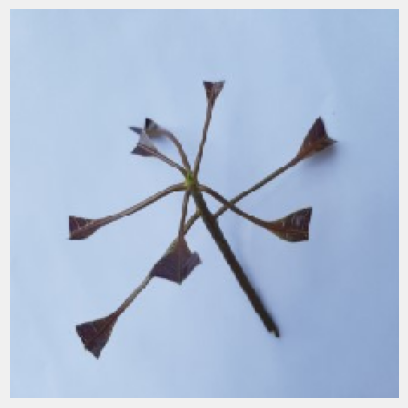

Class_Index:  2
Prediction_strength 1.0


In [ ]:
# load the model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Case_study_mango_leaf/leaf_modelvgg.h5')

#Bad Quality Check
pred_img = keras.utils.load_img(
    "/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Cutting_Weevil/20211011_131115 (Custom).jpg",
    color_mode="rgb",
    target_size=(224,224,3),
)

input_arr = keras.utils.img_to_array(pred_img)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

# Find the index of the class with the highest probability
predicted_class_index = np.argmax(predictions[0])

# Get the probability of the predicted class
predicted_probability = predictions[0][predicted_class_index]

plt.imshow(pred_img)
plt.axis('off')  # Hide axes
plt.show()
print('Class_Index: ',predicted_class_index)
print("Prediction_strength",predicted_probability)

### Forming a set of 10 images for Testing

In [ ]:
# Prediction on folder of 10 images
import os
import random
import shutil
def folder_create(path_source, path_destiny):
  # Source and destination folder paths
  source_folder = path_source
  destination_folder = path_destiny

  # List files in the source folder
  files = os.listdir(source_folder)

  # Randomly select 10 files (or fewer if there are fewer than 10 files in the folder)
  selected_files = random.sample(files, min(10, len(files)))

  # Create destination folder if it doesn't exist
  if not os.path.exists(destination_folder):
      os.makedirs(destination_folder)

  # Copy selected files to the destination folder
  for file_name in selected_files:
      source_file = os.path.join(source_folder, file_name)
      destination_file = os.path.join(destination_folder, file_name)
      shutil.copy(source_file, destination_file)

  print("Selected files copied to the destination folder.")


In [ ]:
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Anthracnose', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Bacterial_Canker', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Cutting_Weevil', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Die_Back', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Gall_Midge', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Healthy', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Powdery_Mildew', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')
folder_create('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test/Sooty_Mould', '/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')


Selected files copied to the destination folder.
Selected files copied to the destination folder.
Selected files copied to the destination folder.
Selected files copied to the destination folder.
Selected files copied to the destination folder.
Selected files copied to the destination folder.
Selected files copied to the destination folder.
Selected files copied to the destination folder.


In [ ]:
image_files = [f for f in os.listdir('/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw')]

In [ ]:
# load the model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Case_study_mango_leaf/leaf_modelvgg.h5')

for image in image_files:
  pred_img = keras.utils.load_img(
      "/content/drive/MyDrive/Case_study_mango_leaf/Leaf_dataset_split/test_raw/" + image,
      color_mode="rgb",
      target_size=(224,224,3),
  )

  input_arr = keras.utils.img_to_array(pred_img)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  predictions = model.predict(input_arr)

  # Find the index of the class with the highest probability
  predicted_class_index = np.argmax(predictions[0])

  # Get the probability of the predicted class
  predicted_probability = predictions[0][predicted_class_index]

  plt.imshow(pred_img)
  plt.axis('off')  # Hide axes
  plt.show()
  print('Class_Index: ',predicted_class_index)
  print("Prediction_strength",predicted_probability)

Output hidden; open in https://colab.research.google.com to view.

### Streamlit Deployment

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import random
from PIL import Image, ImageOps
import numpy as np

import warnings
warnings.filterwarnings("ignore")

st.set_page_config(
    page_title="Mango Leaf Disease Detection",
    page_icon = ":mango:",
    initial_sidebar_state = 'auto'
)
hide_streamlit_style = """
            <style>
            #MainMenu {visibility: hidden;}
            footer {visibility: hidden;}
            </style>
            """
st.markdown(hide_streamlit_style, unsafe_allow_html=True)

def prediction_cls(prediction):
    for key, clss in class_names.items():
        if np.argmax(prediction)==clss:
            return key

@st.cache(allow_output_mutation=True)
def load_model():
    model=tf.keras.models.load_model('/content/drive/MyDrive/Case_study_mango_leaf/leaf_modelvgg.h5')
    return model
with st.spinner('Model is being loaded..'):
    model=load_model()



st.write("""
         # Mango Disease Detection
         """
         )

file = st.file_uploader("", type=["jpg", "png"])

def import_and_predict(image_data, model):
    size = (224, 224)
    image = ImageOps.fit(image_data, size, Image.Resampling.LANCZOS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis,...]
    prediction = model.predict(img_reshape)
    return prediction

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    x = random.randint(98, 99) + random.randint(0, 99) * 0.01
    st.sidebar.error("Accuracy : " + str(x) + " %")

    class_names = {0: 'Anthracnose', 1: 'Bacterial Canker', 2: 'Cutting Weevil', 3: 'Die Back', 4: 'Gall Midge', 5: 'Healthy', 6: 'Powdery Mildew', 7: 'Sooty Mould'}

    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]

    string = "Detected Disease : " + predicted_class_name
    st.sidebar.warning(string)

    if predicted_class_name == 'Healthy':
        st.balloons()
        st.sidebar.success(string)

Writing app.py


### Local Tunnel to run the streamlit local url.

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.391s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
! npm audit fix

npm ERR! code EAUDITNOPJSON
npm ERR! audit No package.json found: Cannot audit a project without a package.json

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2024-05-13T15_20_00_173Z-debug.log


### Password generation for local tunnel.

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.185.253.52


In [ ]:
!mv /content/app.py /content/drive/MyDrive/Case_study_mango_leaf

In [ ]:
!streamlit run /content/drive/MyDrive/Case_study_mango_leaf/app.py &>/content/drive/MyDrive/Case_study_mango_leaf/logs.txt &

#### This cell will run continously until we are using the browser. Once it is terminated the browser will also shut down.

In [ ]:
!npx localtunnel --port 8501    # Use the password generated above to log into local tunnel.

npx: installed 22 in 1.619s
your url is: https://itchy-bugs-divide.loca.lt
^C
